# Titanic with TensorFlow

In [1]:
# General
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modeling
import tensorflow as tf
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report


2023-05-12 12:30:47.473636: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-12 12:30:49.906685: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-12 12:30:49.907773: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-12 12:30:54.152092: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Random Seed
random_seed = 42 # set random seed for reproducibility
tf.random.set_seed(random_seed) # set random seed for TensorFlow
np.random.seed(random_seed) # set random seed for NumPy

## Data

In [3]:
df = pd.read_csv('mice_df_encoded_titanic.csv')
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3.0,34.500000,0.0,0.0,7.8292,0.0,1.0,0.0,1.0,0.0
1,1.0,3.0,47.000000,1.0,0.0,7.0000,1.0,0.0,0.0,0.0,1.0
2,0.0,2.0,62.000000,0.0,0.0,9.6875,0.0,1.0,0.0,1.0,0.0
3,0.0,3.0,27.000000,0.0,0.0,8.6625,0.0,1.0,0.0,0.0,1.0
4,1.0,3.0,22.000000,1.0,1.0,12.2875,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,3.0,24.467036,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0
414,1.0,1.0,39.000000,0.0,0.0,108.9000,1.0,0.0,1.0,0.0,0.0
415,0.0,3.0,38.500000,0.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0
416,0.0,3.0,24.467036,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0


In [4]:
target_column='Survived'

In [5]:
df[target_column] = df[target_column].astype(int)

In [6]:
y_train = np.array(df[target_column]) # value dari label
df = df.drop(target_column, axis=1) # drop target
feature_list = list(df.columns) # list column
X_train = np.array(df) # df dalam bentuk numpy array

In [7]:
# X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target=target_column, train_size=0.8, valid_size=0.1, test_size=0.1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

print(X_train.shape, y_train.shape)
# print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(334, 10) (334,)
(84, 10) (84,)


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

## Modeling

In [12]:
LEARNING_RATE = 0.001
BATCH_SIZE = 16
EPOCHS = 50

In [13]:
tf.keras.backend.clear_session() # clean session
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)), # input layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation ='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
            #   loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test,y_test),
                    epochs=EPOCHS,
                    callbacks=[
                        EarlyStopping(patience=5, restore_best_weights=True),
                        ModelCheckpoint("model/titanic_neural.h5", save_best_only=True)
                    ],
                    batch_size=BATCH_SIZE
                    )

Epoch 1/50
21/21 [==============================] - 2s 36ms/step - loss: 0.6387 - accuracy: 0.6677 - val_loss: 0.5312 - val_accuracy: 0.9881
Epoch 2/50
21/21 [==============================] - 0s 6ms/step - loss: 0.4561 - accuracy: 0.9701 - val_loss: 0.3545 - val_accuracy: 1.0000
Epoch 3/50
21/21 [==============================] - 0s 5ms/step - loss: 0.2759 - accuracy: 0.9970 - val_loss: 0.1853 - val_accuracy: 1.0000
Epoch 4/50
21/21 [==============================] - 0s 6ms/step - loss: 0.1385 - accuracy: 1.0000 - val_loss: 0.0838 - val_accuracy: 1.0000
Epoch 5/50
21/21 [==============================] - 0s 5ms/step - loss: 0.0671 - accuracy: 1.0000 - val_loss: 0.0404 - val_accuracy: 1.0000
Epoch 6/50
21/21 [==============================] - 0s 4ms/step - loss: 0.0371 - accuracy: 1.0000 - val_loss: 0.0227 - val_accuracy: 1.0000
Epoch 7/50
21/21 [==============================] - 0s 4ms/step - loss: 0.0228 - accuracy: 1.0000 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 8/50
21/21 [=

## Model Evaluation

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f'Test Loss is {test_loss}')
print(f'Test Accuracy is {test_acc}')

3/3 [==============================] - 0s 3ms/step - loss: 1.2687e-04 - accuracy: 1.0000
Test Loss is 0.00012686899572145194
Test Accuracy is 1.0


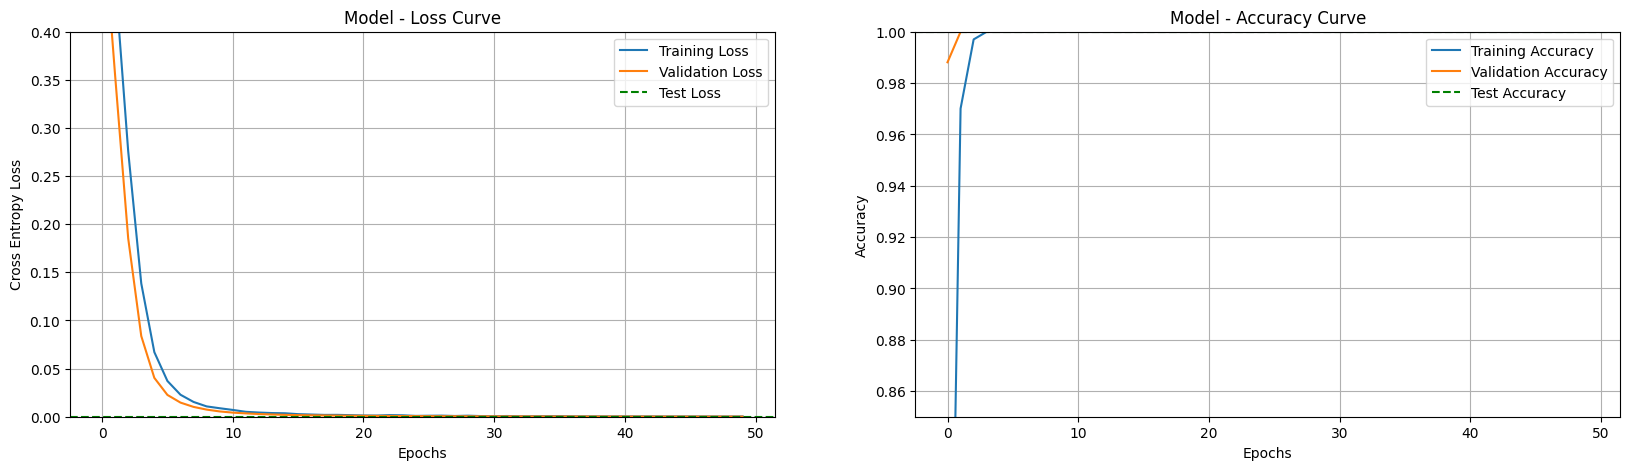

In [16]:
# Collect the history of the training run
history = pd.DataFrame(history.history)

# Create a figure to display the model's performance
plt.figure(figsize=(20, 5))

# Plot the loss curve in the first subplot
plt.subplot(1, 2, 1)
plt.title("Model - Loss Curve")
plt.plot(history['loss'], label="Training Loss")
plt.plot(history['val_loss'], label="Validation Loss")

# Horizontal line to show the testing performance
plt.axhline(y=test_loss, label="Test Loss", linestyle='--', color='green')

# Set the x- and y-labels, and the x- and y-limits
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Loss")
plt.ylim([0, 0.4])

# Show the legend and grid
plt.legend()
plt.grid()

# Plot the accuracy curve in the second subplot
plt.subplot(1, 2, 2)
plt.title("Model - Accuracy Curve")
plt.plot(history['accuracy'], label="Training Accuracy")
plt.plot(history['val_accuracy'], label="Validation Accuracy")

# Horizontal line to show the testing performance
plt.axhline(y=test_acc, label="Test Accuracy", linestyle='--', color='green')

# Set the x- and y-labels, and the x- and y-limits
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.85, 1])

# Show the legend and grid
plt.legend()
plt.grid()

# Display the plot
plt.show()

In [17]:
predict=model.predict(X_test)

y_pred=[]
for i in range(len(predict)):
    y_pred.append(0 if predict[i] < 0.5 else 1)

3/3 [==============================] - 0s 2ms/step


In [18]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



3/3 [==============================] - 0s 2ms/step


Text(0.5, 36.72222222222221, 'Predicted label')

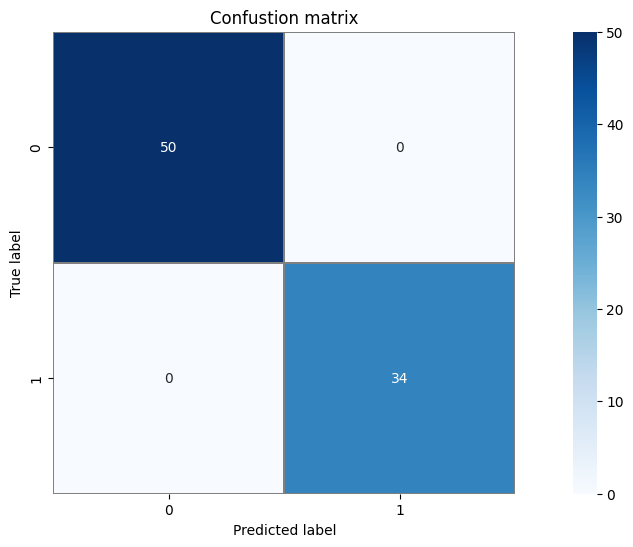

Bad pipe message: %s [b'o\x7f\xc1\x02\x0eG\x03%^$m\x1e0\xb6', b'\x08~ \xe5h\xd7(\n\x05\xa2\xc7\xd5\x97S\xe2\x19\x85\x0626Q\x92\\\x07\x1c\xd6\xaf\xa1\xe6\x0c\x06g\x1d\xc5\xf4\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00']
Bad pipe message: %s [b'\xfd4\x16\xbf]\x06x\xf7\x8c\xe6\xe9X\xe0\x1d&\xa2\xfa( \xfaZ\xeed\xc4\xf8\x8bhU|\xdeG\xb4\x7f\x14\xa5E2\xebx\x8c\x00\x14\xd2r\xecB\x16\xc7\xe9t\xe7\x00\x08\x13\x02\x13']
Bad pipe message: %s [b"\x184\x7f\xefi\xb4\xb5\xc16h\xa0\xf4\x1a\xaaE\x0f\xc6=\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x00\x96\x00\x05\x00\xff\x01\x00\x00j\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03

In [19]:
p_test = model.predict(X_test).argmax(axis=1)
cm = tf.math.confusion_matrix(y_test, y_pred)

f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(cm, annot=True, cmap='Blues', square=True, linewidths=0.01, linecolor='grey')
plt.title('Confustion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')